In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
import requests
import random
from pprint import pprint 
import time
from sklearn.metrics import mean_squared_error
import json
import finnhub
plt.style.use('fivethirtyeight')

In [2]:
# Setup client
finnhub_client = finnhub.Client(api_key="bujelkv48v6righvsoc0")

In [3]:
lowes_earning_surprises = requests.get('https://finnhub.io/api/v1/stock/earnings?symbol=LOW&token=bujelkv48v6righvsoc0')
pprint(lowes_earning_surprises.json())

[{'actual': 3.75,
  'estimate': 2.9795000000000003,
  'period': '2020-09-30',
  'symbol': 'LOW'},
 {'actual': 1.77,
  'estimate': 1.3332000000000002,
  'period': '2020-06-30',
  'symbol': 'LOW'},
 {'actual': 0.94, 'estimate': 0.9191, 'period': '2020-03-31', 'symbol': 'LOW'},
 {'actual': 1.41,
  'estimate': 1.3635000000000002,
  'period': '2019-12-31',
  'symbol': 'LOW'}]


In [4]:
pprint(finnhub_client.company_basic_financials('LOW', 'margin'))

{'metric': {'freeOperatingCashFlow/revenue5Y': 3.98106,
            'freeOperatingCashFlow/revenueTTM': 11.33197,
            'grossMargin5Y': 32.87919,
            'grossMarginAnnual': 31.79991,
            'grossMarginTTM': 32.88636,
            'netProfitMargin5Y': 4.67119,
            'netProfitMarginAnnual': 5.93364,
            'netProfitMarginTTM': 7.12011,
            'operatingMargin5Y': 8.11234,
            'operatingMarginAnnual': 8.75146,
            'operatingMarginTTM': 10.52841,
            'pretaxMargin5Y': 7.17679,
            'pretaxMarginAnnual': 7.7937,
            'pretaxMarginTTM': 9.55319},
 'metricType': 'margin',
 'symbol': 'LOW'}


In [5]:
lowes_financial_estimates = finnhub_client.company_revenue_estimates('LOW', freq='quarterly')
pprint(lowes_financial_estimates)

{'data': [{'numberAnalysts': 2,
           'period': '2023-03-31',
           'revenueAvg': 18365430300,
           'revenueHigh': 18455900400,
           'revenueLow': 17551199400},
          {'numberAnalysts': 2,
           'period': '2022-12-31',
           'revenueAvg': 19566307250,
           'revenueHigh': 19662693000,
           'revenueLow': 18698835500},
          {'numberAnalysts': 2,
           'period': '2022-09-30',
           'revenueAvg': 24220254799,
           'revenueHigh': 24339566400,
           'revenueLow': 23146450400},
          {'numberAnalysts': 2,
           'period': '2022-06-30',
           'revenueAvg': 20803328349,
           'revenueHigh': 20905807800,
           'revenueLow': 19881013300},
          {'numberAnalysts': 12,
           'period': '2022-03-31',
           'revenueAvg': 18439200500,
           'revenueHigh': 19749546000,
           'revenueLow': 16373697000},
          {'numberAnalysts': 12,
           'period': '2021-12-31',
           'reve

In [20]:
lowes_financial_estimates_df = pd.DataFrame(lowes_financial_estimates['data'])
lowes_financial_estimates_df

,numberAnalysts,period,revenueAvg,revenueHigh,revenueLow
0,2,2023-03-31,18365430300,18455900400,17551199400
1,2,2022-12-31,19566307250,19662693000,18698835500
2,2,2022-09-30,24220254799,24339566400,23146450400
3,2,2022-06-30,20803328349,20905807800,19881013300
4,12,2022-03-31,18439200500,19749546000,16373697000
...,...,...,...,...,...
102,2,1997-06-30,2409204000,2421072000,2302392000
103,2,1997-03-31,2178494500,2189226000,2081911000
104,2,1996-12-31,2211583500,2222478000,2113533000
105,2,1996-09-30,2401490000,2413320000,2295020000


In [22]:
lowes_fin_est_df = lowes_financial_estimates_df[['period','revenueAvg', 'revenueHigh', 'revenueLow']]
lowes_estimates =lowes_fin_est_df.rename(columns={'period': 'date'})
lowes_estimates

,date,revenueAvg,revenueHigh,revenueLow
0,2023-03-31,18365430300,18455900400,17551199400
1,2022-12-31,19566307250,19662693000,18698835500
2,2022-09-30,24220254799,24339566400,23146450400
3,2022-06-30,20803328349,20905807800,19881013300
4,2022-03-31,18439200500,19749546000,16373697000
...,...,...,...,...
102,1997-06-30,2409204000,2421072000,2302392000
103,1997-03-31,2178494500,2189226000,2081911000
104,1996-12-31,2211583500,2222478000,2113533000
105,1996-09-30,2401490000,2413320000,2295020000


In [6]:
recommendations = finnhub_client.recommendation_trends('LOW')
pprint(recommendations)

[{'buy': 12,
  'hold': 14,
  'period': '2020-10-01',
  'sell': 0,
  'strongBuy': 9,
  'strongSell': 1,
  'symbol': 'LOW'},
 {'buy': 17,
  'hold': 7,
  'period': '2020-09-01',
  'sell': 0,
  'strongBuy': 11,
  'strongSell': 0,
  'symbol': 'LOW'},
 {'buy': 16,
  'hold': 6,
  'period': '2020-08-01',
  'sell': 0,
  'strongBuy': 12,
  'strongSell': 0,
  'symbol': 'LOW'},
 {'buy': 11,
  'hold': 13,
  'period': '2020-07-01',
  'sell': 0,
  'strongBuy': 9,
  'strongSell': 1,
  'symbol': 'LOW'},
 {'buy': 11,
  'hold': 13,
  'period': '2020-06-01',
  'sell': 0,
  'strongBuy': 9,
  'strongSell': 1,
  'symbol': 'LOW'},
 {'buy': 16,
  'hold': 8,
  'period': '2020-05-01',
  'sell': 0,
  'strongBuy': 10,
  'strongSell': 0,
  'symbol': 'LOW'},
 {'buy': 11,
  'hold': 13,
  'period': '2020-04-01',
  'sell': 0,
  'strongBuy': 9,
  'strongSell': 1,
  'symbol': 'LOW'},
 {'buy': 11,
  'hold': 13,
  'period': '2020-03-01',
  'sell': 0,
  'strongBuy': 9,
  'strongSell': 1,
  'symbol': 'LOW'},
 {'buy': 11,
  '

In [7]:
lowes_recommendations_df = pd.DataFrame(recommendations)
lowes_recommendations_df.head()

,buy,hold,period,sell,strongBuy,strongSell,symbol
0,12,14,2020-10-01,0,9,1,LOW
1,17,7,2020-09-01,0,11,0,LOW
2,16,6,2020-08-01,0,12,0,LOW
3,11,13,2020-07-01,0,9,1,LOW
4,11,13,2020-06-01,0,9,1,LOW


In [24]:
lowes_rec_df = lowes_recommendations_df[['period','buy', 'hold','sell']]
lowes_remmendations = lowes_rec_df.rename(columns={'period': 'date'})
lowes_remmendations

,date,buy,hold,sell
0,2020-10-01,12,14,0
1,2020-09-01,17,7,0
2,2020-08-01,16,6,0
3,2020-07-01,11,13,0
4,2020-06-01,11,13,0
5,2020-05-01,16,8,0
6,2020-04-01,11,13,0
7,2020-03-01,11,13,0
8,2020-02-01,11,13,0
9,2020-01-01,11,13,0


In [8]:
# Stock splits
stock_splits = finnhub_client.stock_splits('LOW', _from='1990-01-01', to='2020-04-01')
pprint(stock_splits)

[{'date': '2006-07-03', 'fromFactor': 1, 'symbol': 'LOW', 'toFactor': 2},
 {'date': '2001-07-02', 'fromFactor': 1, 'symbol': 'LOW', 'toFactor': 2},
 {'date': '1998-06-29', 'fromFactor': 1, 'symbol': 'LOW', 'toFactor': 2},
 {'date': '1994-04-04', 'fromFactor': 1, 'symbol': 'LOW', 'toFactor': 2},
 {'date': '1992-06-29', 'fromFactor': 1, 'symbol': 'LOW', 'toFactor': 2}]


In [25]:
lowes_splits_df = pd.DataFrame(stock_splits)
lowes_splits = lowes_splits_df[['date','fromFactor','toFactor']]
lowes_splits

,date,fromFactor,toFactor
0,2006-07-03,1,2
1,2001-07-02,1,2
2,1998-06-29,1,2
3,1994-04-04,1,2
4,1992-06-29,1,2


In [10]:
# Stock dividends
dividends = finnhub_client.stock_dividends('LOW', _from='1990-01-01', to='2020-04-01')
pprint(dividends)

[{'adjustedAmount': 0.55,
  'amount': 0.55,
  'currency': 'USD',
  'date': '2020-01-21',
  'declarationDate': '2019-11-08',
  'payDate': '2020-02-05',
  'recordDate': '2020-01-22',
  'symbol': 'LOW'},
 {'adjustedAmount': 0.55,
  'amount': 0.55,
  'currency': 'USD',
  'date': '2019-10-22',
  'declarationDate': '2019-08-15',
  'payDate': '2019-11-06',
  'recordDate': '2019-10-23',
  'symbol': 'LOW'},
 {'adjustedAmount': 0.55,
  'amount': 0.55,
  'currency': 'USD',
  'date': '2019-07-23',
  'declarationDate': '2019-05-31',
  'payDate': '2019-08-07',
  'recordDate': '2019-07-24',
  'symbol': 'LOW'},
 {'adjustedAmount': 0.48,
  'amount': 0.48,
  'currency': 'USD',
  'date': '2019-04-23',
  'declarationDate': '2019-03-22',
  'payDate': '2019-05-08',
  'recordDate': '2019-04-24',
  'symbol': 'LOW'},
 {'adjustedAmount': 0.48,
  'amount': 0.48,
  'currency': 'USD',
  'date': '2019-01-22',
  'declarationDate': '2018-11-09',
  'payDate': '2019-02-06',
  'recordDate': '2019-01-23',
  'symbol': 'LO

In [11]:
lowes_dividends_df = pd.DataFrame(dividends)
lowes_dividends_df.head()

,symbol,date,amount,adjustedAmount,payDate,recordDate,declarationDate,currency
0,LOW,2020-01-21,0.55,0.55,2020-02-05,2020-01-22,2019-11-08,USD
1,LOW,2019-10-22,0.55,0.55,2019-11-06,2019-10-23,2019-08-15,USD
2,LOW,2019-07-23,0.55,0.55,2019-08-07,2019-07-24,2019-05-31,USD
3,LOW,2019-04-23,0.48,0.48,2019-05-08,2019-04-24,2019-03-22,USD
4,LOW,2019-01-22,0.48,0.48,2019-02-06,2019-01-23,2018-11-09,USD


In [27]:
lowes_div_df = lowes_dividends_df[['date', 'amount']]
lowes_dividends = lowes_div_df.rename(columns={'amount': 'divAmount'})
lowes_dividends

,date,divAmount
0,2020-01-21,0.55
1,2019-10-22,0.55
2,2019-07-23,0.55
3,2019-04-23,0.48
4,2019-01-22,0.48
...,...,...
118,1991-01-14,0.13
119,1990-10-11,0.13
120,1990-07-11,0.13
121,1990-04-09,0.13


<function matplotlib.pyplot.show(*args, **kw)>

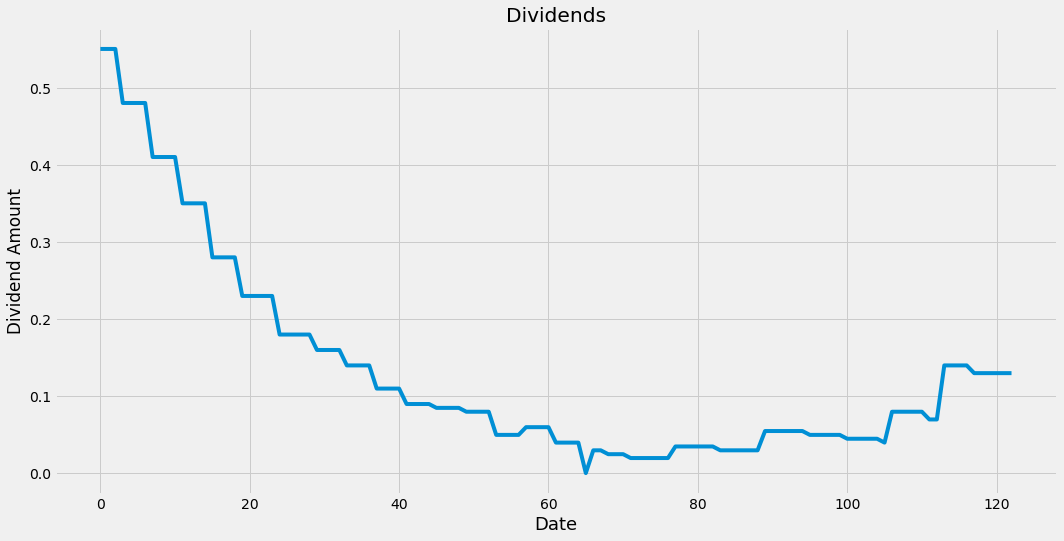

In [49]:
#visualizing historical data
plt.figure(figsize=(16, 8))
plt.title('Dividends')
plt.plot(lowes_dividends['divAmount'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Dividend Amount')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

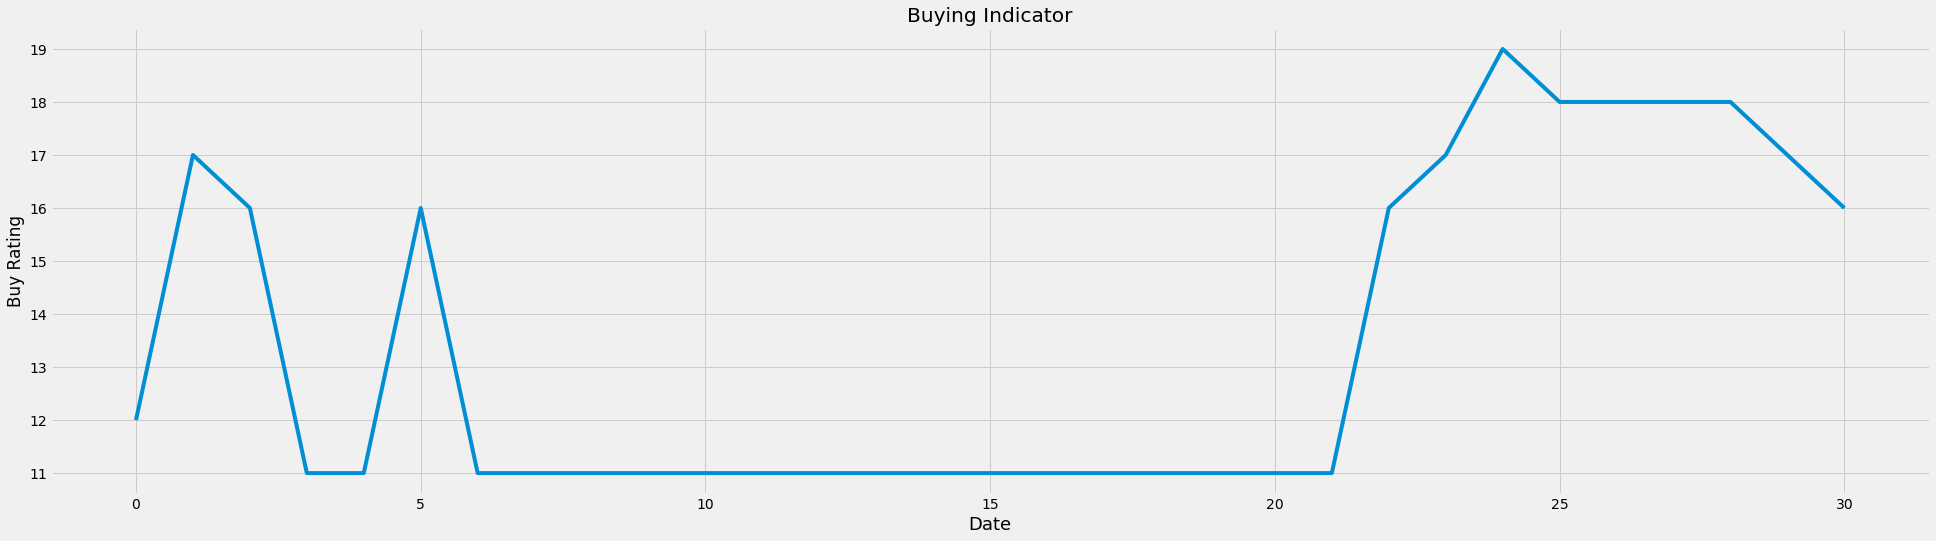

In [56]:
#visualizing historical data
plt.figure(figsize=(30, 8))
plt.title('Buying Indicator')
plt.plot(lowes_remmendations['buy'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Buy Rating')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

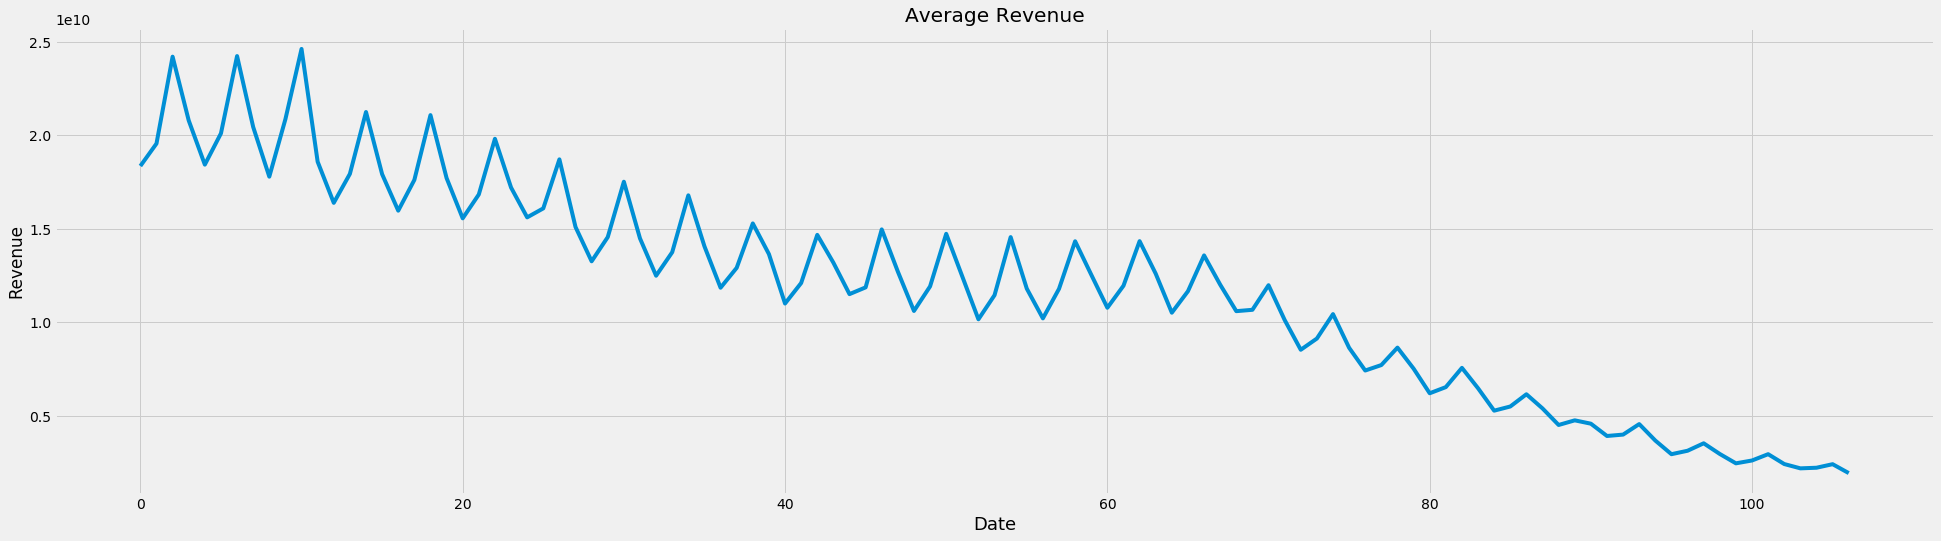

In [57]:
#visualizing historical data
plt.figure(figsize=(30, 8))
plt.title('Average Revenue')
plt.plot(lowes_estimates['revenueAvg'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue')
plt.show